## 1 : Chargement des données et vérification des types

In [5]:
import pandas as pd
import numpy as np

DATA_PATH = "../data/clients_microfinance.csv"

# Génération des données
from faker import Faker
fake = Faker('fr_FR')
np.random.seed(42)

n = 2000
data = {
    'client_id': np.arange(1, n+1),
    'sexe': np.random.choice(['M', 'F'], n, p=[0.55, 0.45]),
    'age': np.random.randint(18, 70, n),
    'situation_familiale': np.random.choice(['Célibataire', 'Marié(e)', 'Veuf/veuve', 'Divorcé(e)'], n, p=[0.3, 0.5, 0.1, 0.1]),
    'nombre_enfants': np.random.poisson(1.2, n),
    'niveau_etude': np.random.choice(['Aucun', 'Primaire', 'Secondaire', 'Supérieur'], n, p=[0.25, 0.35, 0.3, 0.1]),
    'secteur_activite': np.random.choice(['Agriculture', 'Commerce', 'Artisanat', 'Services'], n, p=[0.4, 0.3, 0.2, 0.1]),
    'revenu_mensuel': np.abs(np.random.normal(180000, 60000, n)).astype(int),
    'montant_pret': np.random.uniform(50000, 600000, n).astype(int),
    'duree_pret': np.random.choice([6, 12, 18, 24], n, p=[0.2, 0.4, 0.3, 0.1]),
    'taux_interet': np.random.uniform(4.5, 18.0, n).round(1),
    'but_du_pret': np.random.choice(['Achat équipement', 'Capital démarrage', 'Stock', 'Urgence'], n),
    'historique_defaut': np.random.choice(['Oui', 'Non'], n, p=[0.25, 0.75]),
    'remboursement_pret_prec': np.random.choice(['Oui', 'Non', 'Aucun'], n, p=[0.6, 0.1, 0.3]),
    'score_credit': np.clip(np.random.normal(65, 15, n), 30, 95).astype(int),
    'zone_residentielle': np.random.choice(['Urbaine', 'Rurale'], n, p=[0.4, 0.6]),
    'contact_telephone': np.random.choice(['Oui', 'Non'], n, p=[0.8, 0.2]),
    'co_emprunteur': np.random.choice(['Oui', 'Non'], n, p=[0.35, 0.65])
}

# Création de la variable cible
df = pd.DataFrame(data)
df['delai_remboursement'] = np.where(
    (df['score_credit'] < 50) | 
    (df['historique_defaut'] == 'Oui') |
    (df['revenu_mensuel'] < 0.15 * df['montant_pret']),
    'Non', 'Oui'
)

# Sauvegarde dans le dossier data
df.to_csv(DATA_PATH, index=False)
print(f"✅ Données générées et sauvegardées dans {DATA_PATH}")

# Affichage des premières lignes
df.head()

✅ Données générées et sauvegardées dans ../data/clients_microfinance.csv


,client_id,sexe,age,situation_familiale,nombre_enfants,niveau_etude,secteur_activite,revenu_mensuel,montant_pret,duree_pret,taux_interet,but_du_pret,historique_defaut,remboursement_pret_prec,score_credit,zone_residentielle,contact_telephone,co_emprunteur,delai_remboursement
0,1,M,45,Marié(e),1,Aucun,Agriculture,80894,200854,6,4.8,Urgence,Non,Oui,67,Rurale,Non,Non,Oui
1,2,F,24,Veuf/veuve,2,Primaire,Commerce,195540,594470,18,11.0,Achat équipement,Non,Oui,76,Rurale,Oui,Non,Oui
2,3,F,52,Marié(e),2,Primaire,Services,187202,422167,24,7.5,Stock,Oui,Aucun,54,Rurale,Oui,Oui,Non
3,4,F,45,Marié(e),1,Primaire,Agriculture,167407,545470,12,10.1,Stock,Non,Oui,54,Rurale,Oui,Oui,Oui
4,5,M,31,Marié(e),2,Primaire,Agriculture,208975,476175,18,16.1,Capital démarrage,Oui,Aucun,42,Urbaine,Oui,Non,Non


## 2 : Gestion des valeurs manquantes

In [6]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Remplissage des valeurs manquantes
df['score_credit'] = df['score_credit'].fillna(df['score_credit'].median())

Valeurs manquantes par colonne :
client_id                  0
sexe                       0
age                        0
situation_familiale        0
nombre_enfants             0
niveau_etude               0
secteur_activite           0
revenu_mensuel             0
montant_pret               0
duree_pret                 0
taux_interet               0
but_du_pret                0
historique_defaut          0
remboursement_pret_prec    0
score_credit               0
zone_residentielle         0
contact_telephone          0
co_emprunteur              0
delai_remboursement        0
dtype: int64


## 3 : Encodage des variables catégorielles

In [7]:
le = LabelEncoder()
binary_cols = ['sexe', 'historique_defaut', 'delai_remboursement']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['secteur_activite', 'niveau_etude'])

## 4 : Visualisations des distributions

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
colors = ['#2ecc71', '#3498db']  # Palette verte/bleue

### Variables Numériques

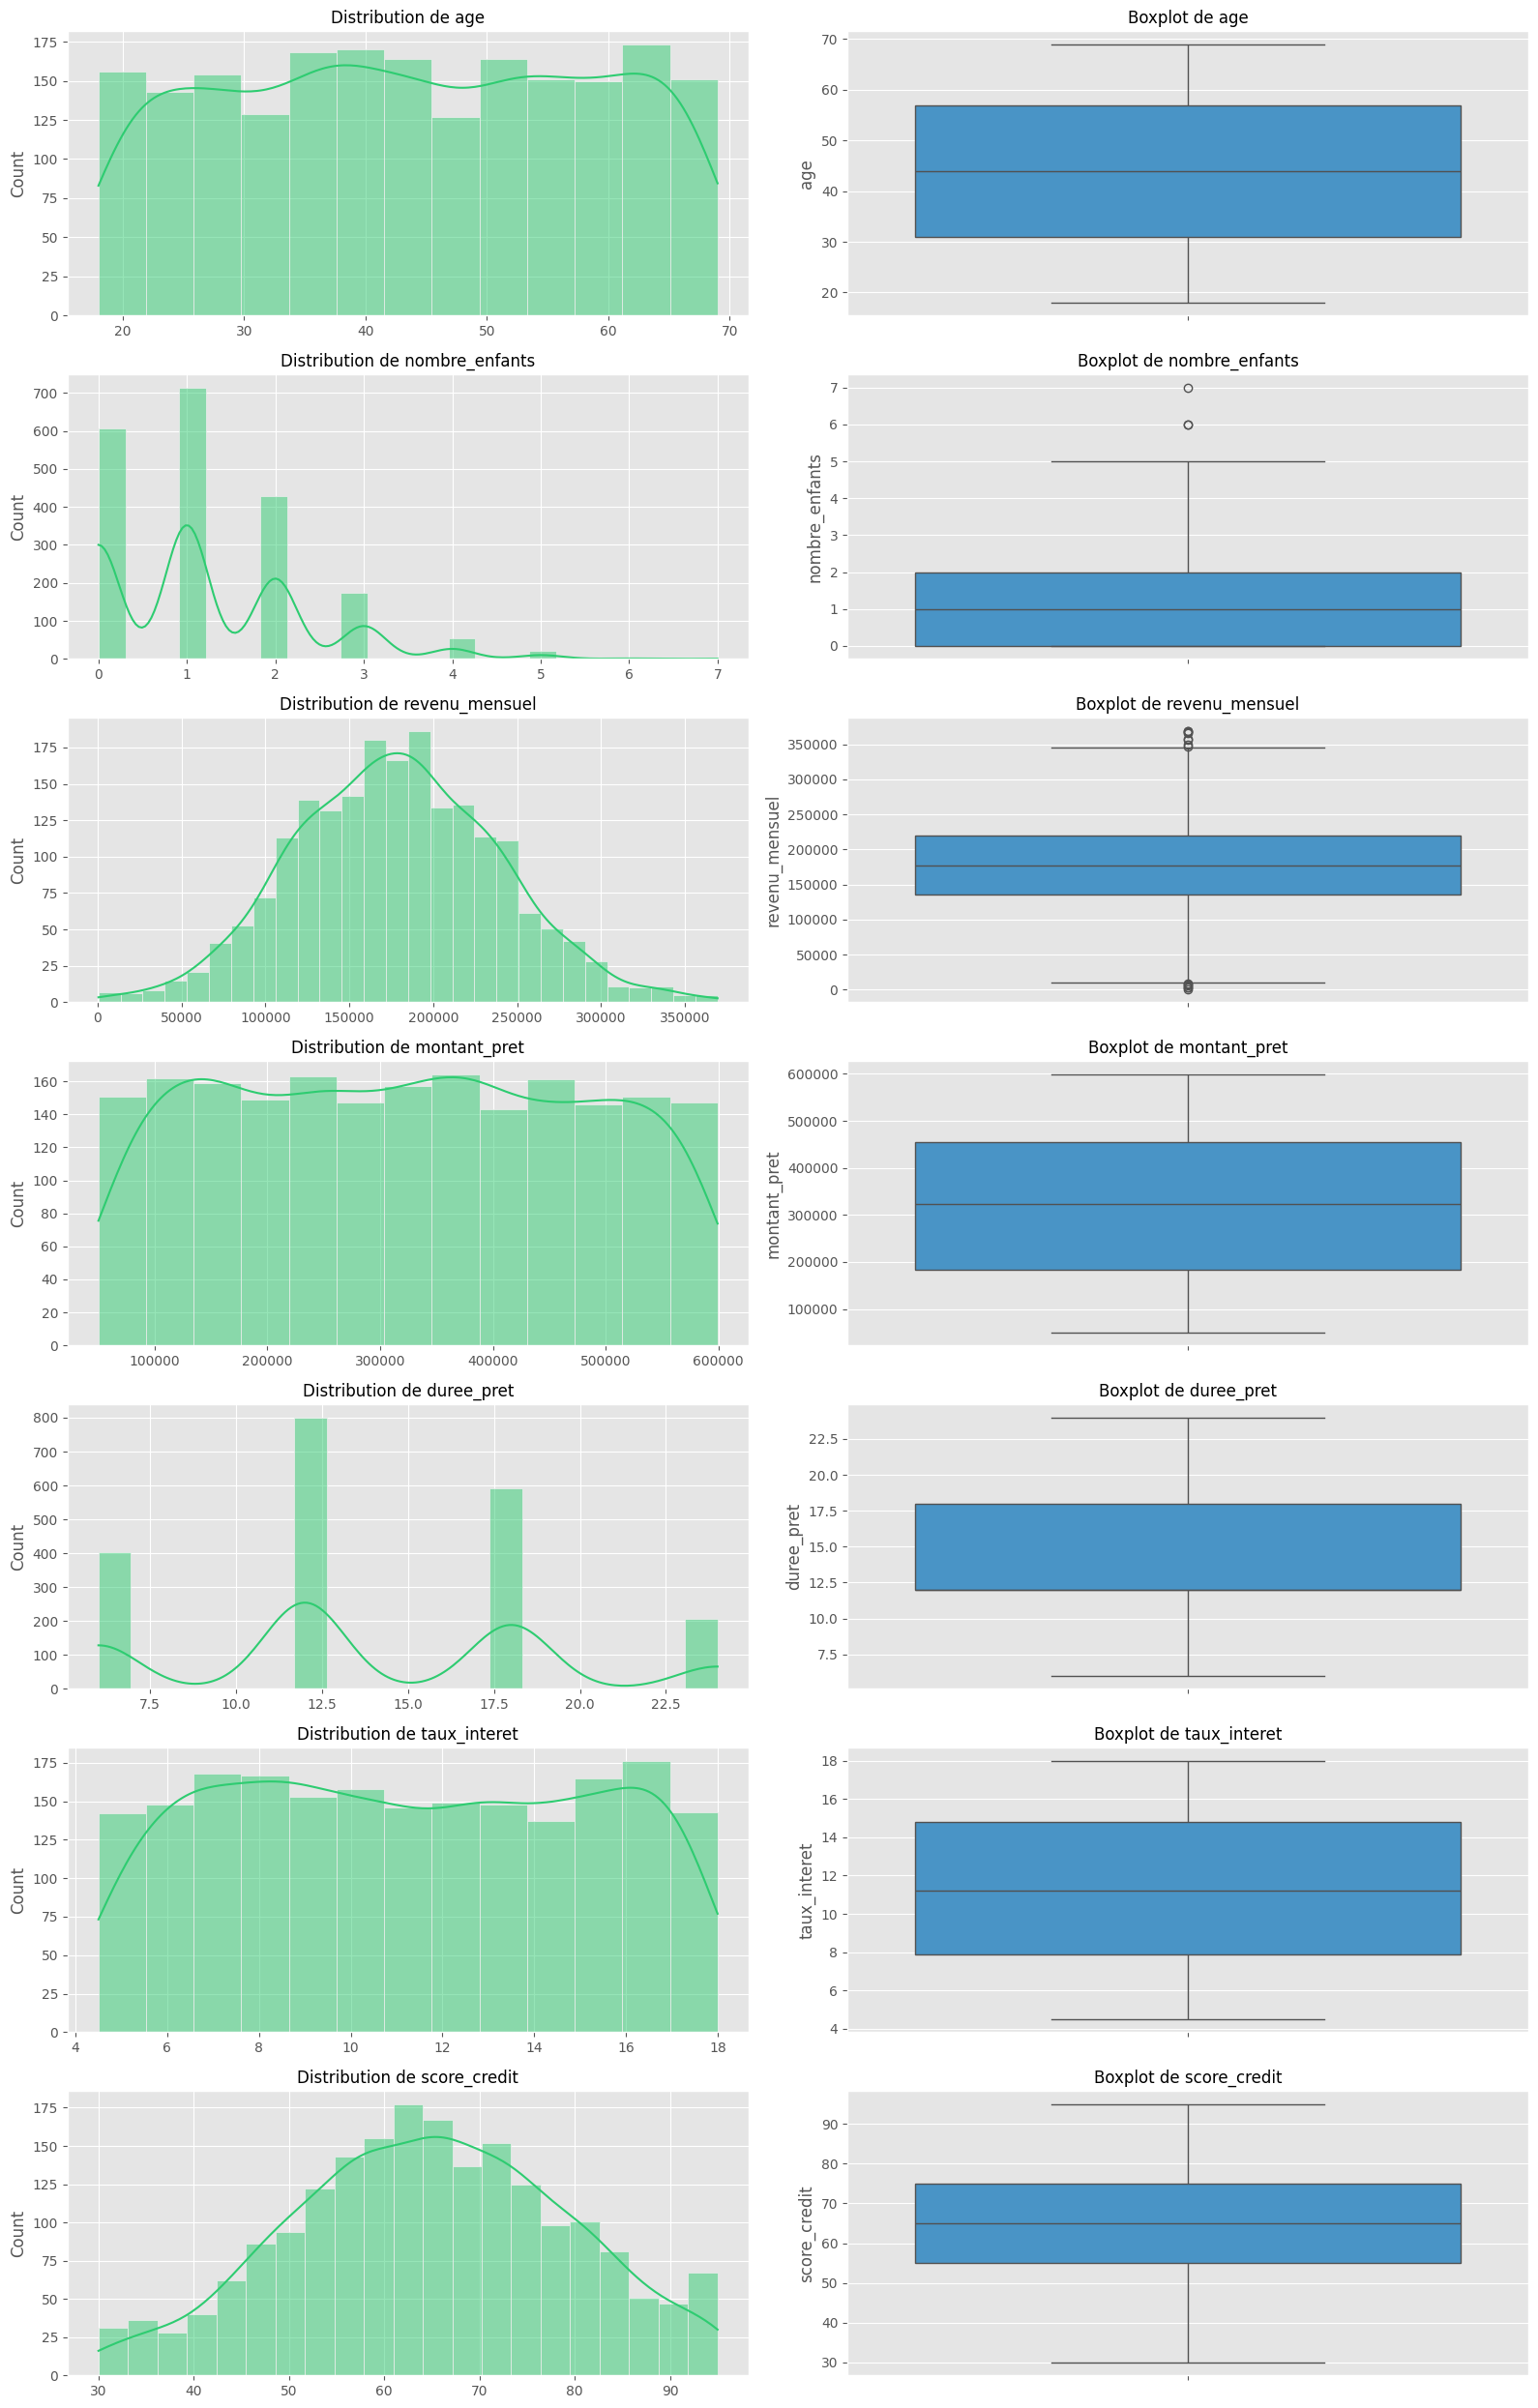

In [27]:
num_vars = ['age', 'nombre_enfants', 'revenu_mensuel', 
           'montant_pret', 'duree_pret', 'taux_interet', 'score_credit']

fig, axes = plt.subplots(nrows=len(num_vars), ncols=2, figsize=(16, 25))

for idx, var in enumerate(num_vars):
    # Histogramme + KDE
    sns.histplot(df[var], kde=True, ax=axes[idx, 0], color=colors[0])
    axes[idx, 0].set_title(f'Distribution de {var}', fontsize=12)
    axes[idx, 0].set_xlabel('')
    
    # Boxplot
    sns.boxplot(y=df[var], ax=axes[idx, 1], color=colors[1])
    axes[idx, 1].set_title(f'Boxplot de {var}', fontsize=12)
    
plt.tight_layout()
plt.show()

### Variables Catégorielles

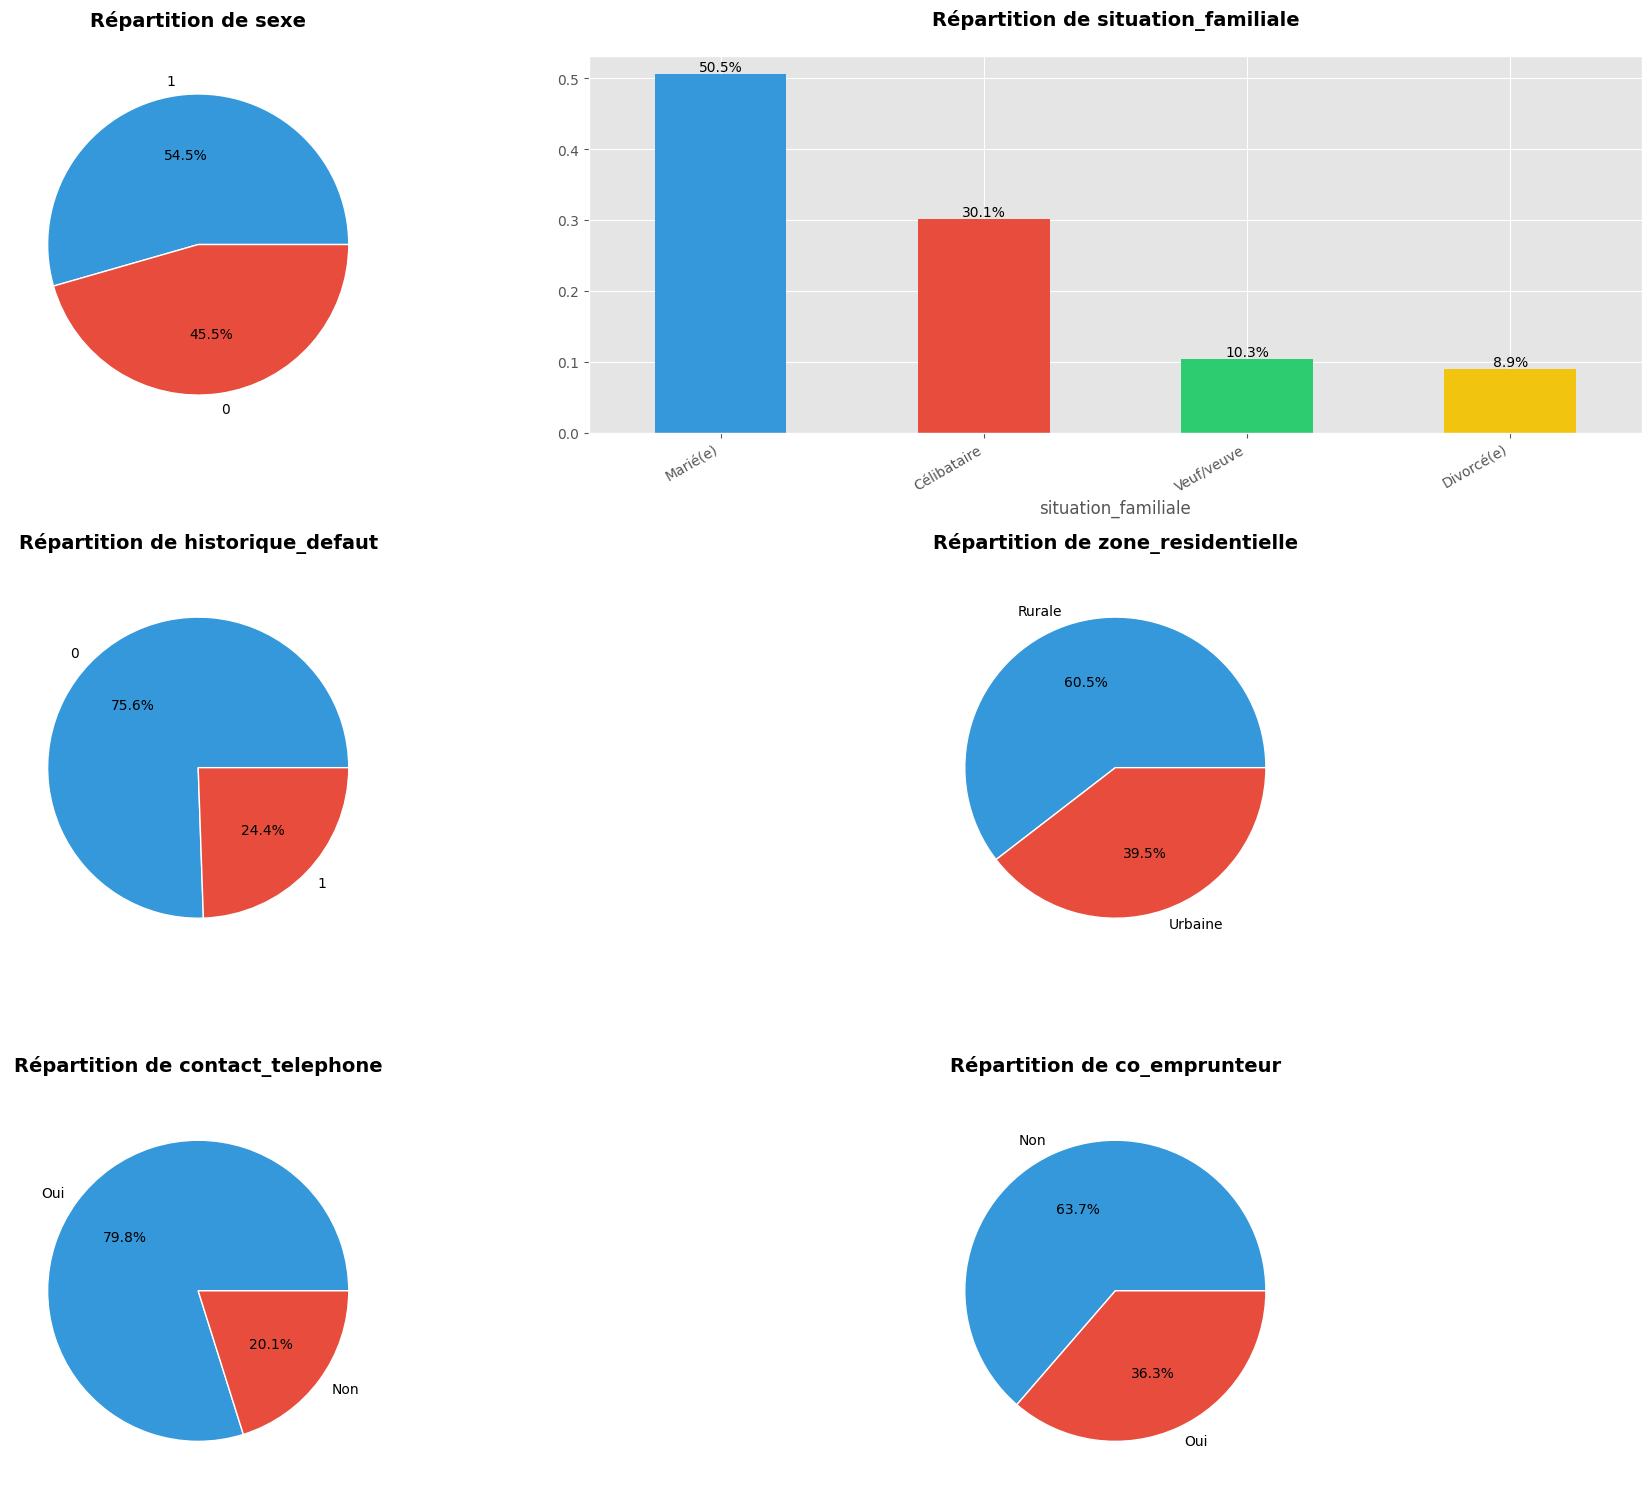

In [29]:
# Liste des variables catégorielles non encodées
cat_vars = [
    'sexe', 
    'situation_familiale',
    'historique_defaut',
    'zone_residentielle',
    'contact_telephone',
    'co_emprunteur'
]

# Configuration du plot
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 2)  # Adapté au nouveau nombre de variables

# Palette de couleurs
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f']

for idx, var in enumerate(cat_vars):
    try:
        ax = fig.add_subplot(gs[idx])
        counts = df[var].value_counts(normalize=True)
        
        # Choix du type de graphique
        if len(counts) > 2:
            # Barplot avec annotations
            bars = counts.plot(kind='bar', color=colors, ax=ax)
            ax.set_xticklabels(counts.index, rotation=30, ha='right')
            
            # Ajout des pourcentages
            for p in bars.patches:
                ax.annotate(f'{p.get_height():.1%}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 5), 
                           textcoords='offset points')
        else:
            # Pie chart simplifié
            counts.plot(kind='pie', autopct='%1.1f%%', 
                       colors=colors[:len(counts)], 
                       wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                       ax=ax)
        
        ax.set_title(f'Répartition de {var}\n', fontsize=14, fontweight='bold')
        ax.set_ylabel('')
        
    except KeyError as e:
        print(f"⚠️ Variable non trouvée : {e}. Vérifier l'encodage préalable.")
        continue

plt.tight_layout()
plt.show()

### Analyse des variables encodées

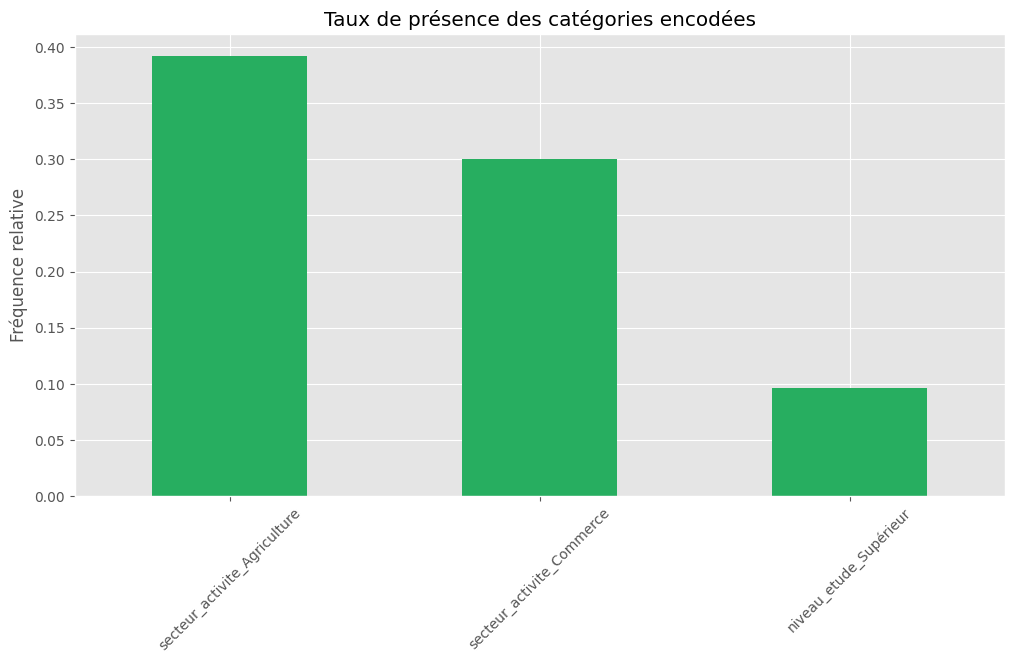

In [30]:
encoded_vars = [
    'secteur_activite_Agriculture',
    'secteur_activite_Commerce',
    'niveau_etude_Supérieur'
]

plt.figure(figsize=(12, 6))
df[encoded_vars].mean().plot(kind='bar', color='#27ae60')
plt.title('Taux de présence des catégories encodées')
plt.xticks(rotation=45)
plt.ylabel('Fréquence relative')
plt.show()

## 5 : Détection des outliers

Bornes de détection :


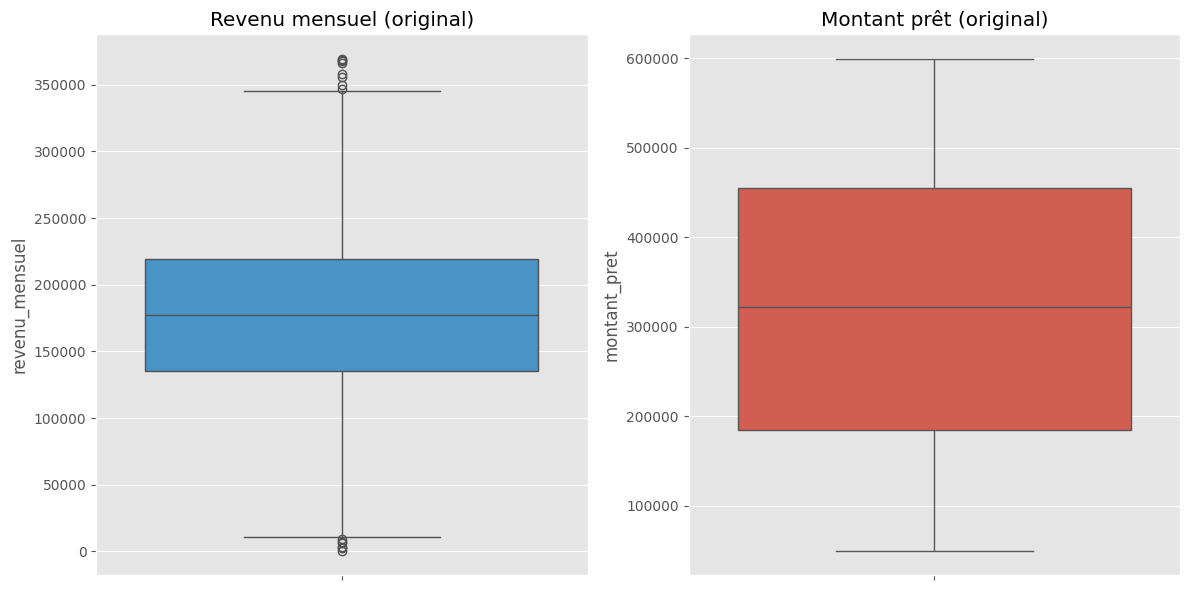

In [32]:
# Configuration des variables et paramètres
outlier_vars = ['revenu_mensuel', 'montant_pret']
factor = 1.5  # Seuil standard pour détection modérée

# Calcul des bornes pour chaque variable
Q1 = df[outlier_vars].quantile(0.25)
Q3 = df[outlier_vars].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# Affichage des limites calculées
print("Bornes de détection :")
pd.DataFrame({
    'Variable': outlier_vars,
    'Lower Bound': lower_bound.values,
    'Upper Bound': upper_bound.values
}).style.format("{:,.0f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['revenu_mensuel'], color='#3498db')
plt.title('Revenu mensuel (original)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['montant_pret'], color='#e74c3c')
plt.title('Montant prêt (original)')

plt.tight_layout()
plt.show()

## 6 : Profils à risque

In [33]:
risky = df[df['delai_remboursement'] == 0]
print("Caractéristiques moyennes des clients à risque :")
print(risky[['age', 'revenu_mensuel', 'score_credit']].mean())

Caractéristiques moyennes des clients à risque :
age                   44.062005
revenu_mensuel    171641.843008
score_credit          57.625330
dtype: float64


## 7 : Corrélations

<Axes: >

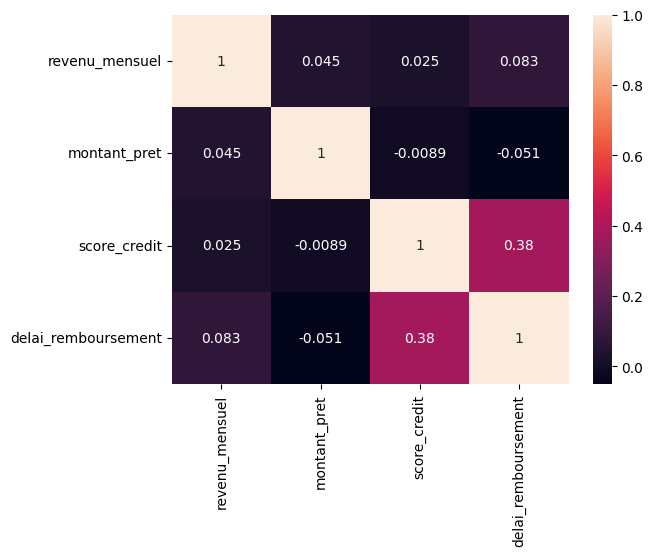

In [12]:
import seaborn as sns 

corr_matrix = df[['revenu_mensuel', 'montant_pret', 'score_credit', 'delai_remboursement']].corr()
sns.heatmap(corr_matrix, annot=True)

## 8 : Défauts par secteur

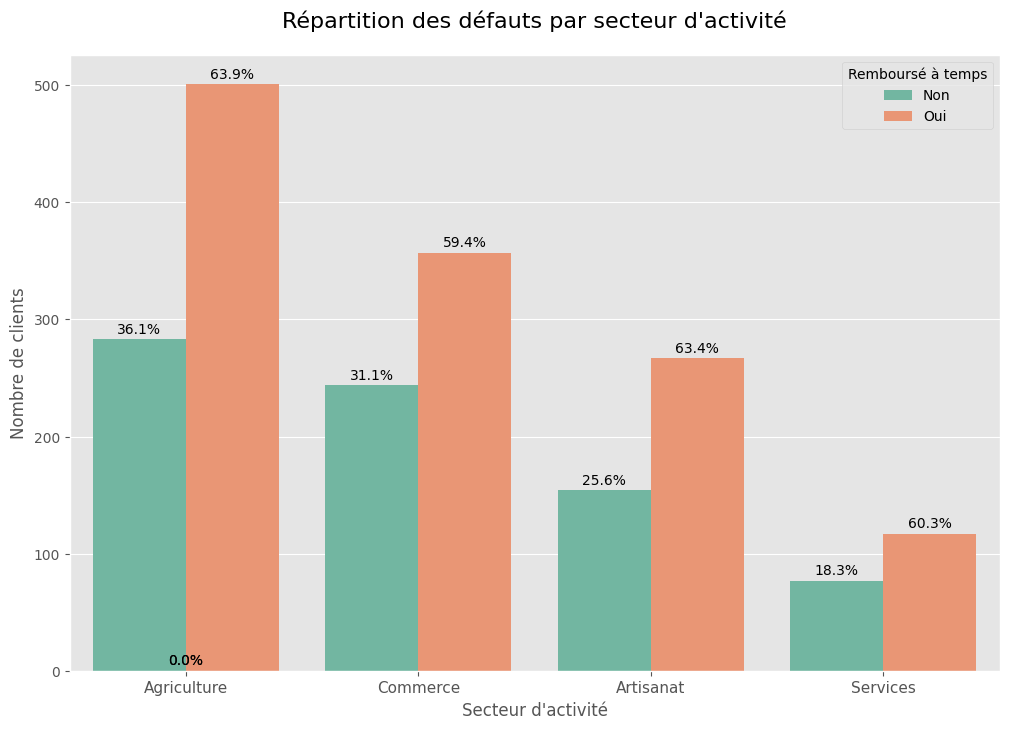

In [34]:
df['secteur'] = df.filter(like='secteur_activite_').idxmax(axis=1).str.replace('secteur_activite_', '')

# Création du countplot multi-secteurs
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='secteur', 
                 hue='delai_remboursement', 
                 data=df,
                 order=df['secteur'].value_counts().index,
                 palette='Set2')

# Personnalisation avancée
plt.title('Répartition des défauts par secteur d\'activité', fontsize=16, pad=20)
plt.xlabel('Secteur d\'activité', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.xticks(fontsize=11)

# Ajout des pourcentages
total_counts = df['secteur'].value_counts().values
for p in ax.patches:
    height = p.get_height()
    sector_idx = int(p.get_x() + p.get_width()/2)
    sector_total = total_counts[sector_idx]
    
    ax.text(p.get_x() + p.get_width()/2., height + 5, 
           f'{height/sector_total:.1%}', 
           ha='center', fontsize=10)

plt.legend(title='Remboursé à temps', labels=['Non', 'Oui'])
plt.show()

## 9 : Remboursement par genre

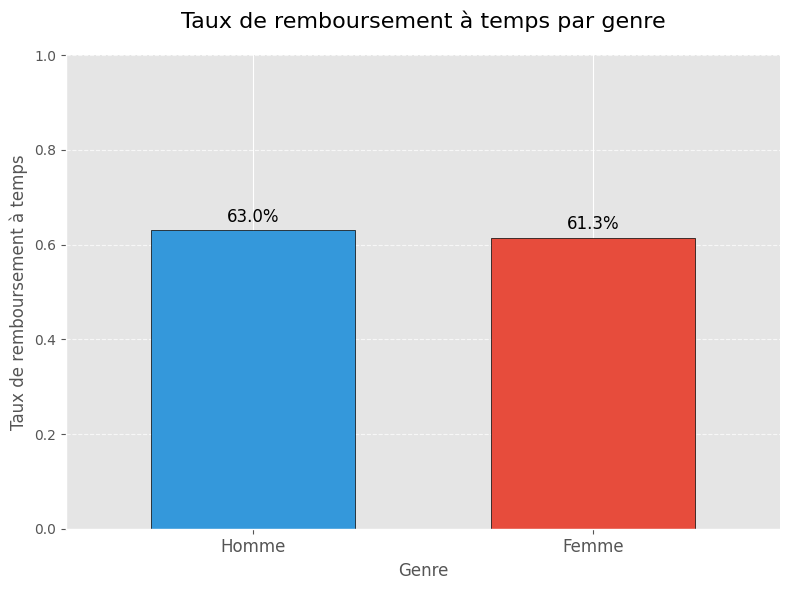

In [35]:
# Calcul des taux avec étiquettage
remboursement_sexe = (
    df.groupby('sexe')['delai_remboursement']
    .mean()
    .rename(index={0: 'Homme', 1: 'Femme'})
)

# Création du graphique avec personnalisation
plt.figure(figsize=(8, 6))
ax = remboursement_sexe.plot(
    kind='bar',
    color=['#3498db', '#e74c3c'],
    edgecolor='black',
    width=0.6
)

# Personnalisation avancée
plt.title("Taux de remboursement à temps par genre", fontsize=16, pad=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Taux de remboursement à temps', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0, fontsize=12)

# Ajout des pourcentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12)

# Ajustements finaux
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

Les femmes ont un taux de remboursement à temps légèrement inférieur, mais quasimment semblable

## 10 : Zone résidentielle

/tmp/ipykernel_7632/441509726.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


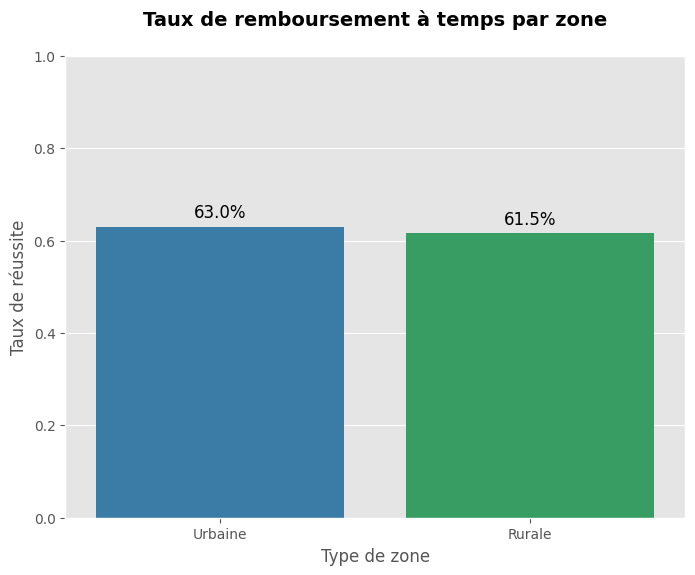

In [43]:
# %% [markdown]
"""
## 10. Comportement de remboursement par zone résidentielle
"""

# %%
# Vérification dynamique des noms de colonnes
zone_cols = [c for c in df.columns if 'zone_residentielle_' in c]

if len(zone_cols) == 2:
    # Version avec one-hot encoding
    df_zone = pd.DataFrame({
        'Urbaine': df[zone_cols[0]],
        'Rurale': df[zone_cols[1]],
        'Remboursé': df['delai_remboursement']
    })
    
    taux_urbain = df_zone[df_zone['Urbaine'] == 1]['Remboursé'].mean()
    taux_rural = df_zone[df_zone['Rurale'] == 1]['Remboursé'].mean()
    
elif 'zone_residentielle' in df.columns:
    # Version avec colonne originale
    taux_urbain = df[df['zone_residentielle'] == 'Urbaine']['delai_remboursement'].mean()
    taux_rural = df[df['zone_residentielle'] == 'Rurale']['delai_remboursement'].mean()
    
else:
    raise KeyError("Aucune colonne de zone résidentielle détectée")

# Création du graphique
plt.figure(figsize=(8, 6))
sns.barplot(
    x=['Urbaine', 'Rurale'], 
    y=[taux_urbain, taux_rural],
    palette=['#2980b9', '#27ae60']
)

plt.title('Taux de remboursement à temps par zone\n', fontsize=14, fontweight='bold')
plt.xlabel('Type de zone', fontsize=12)
plt.ylabel('Taux de réussite', fontsize=12)
plt.ylim(0, 1)

# Ajout des annotations
for idx, taux in enumerate([taux_urbain, taux_rural]):
    plt.text(idx, taux + 0.02, f'{taux:.1%}', 
             ha='center', fontsize=12, color='black')

plt.show()

## 11 : Régression logistique

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Nettoyage des colonnes non utilisées
df_clean = df.drop(['client_id', 'but_du_pret'], axis=1, errors='ignore')

# Séparation des variables numériques et catégorielles
categorical_features = df_clean.select_dtypes(include='object').columns.tolist()
categorical_features = [col for col in categorical_features if col != 'delai_remboursement']

# Définition du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Préparation des données
X = preprocessor.fit_transform(df_clean.drop('delai_remboursement', axis=1))
y = df_clean['delai_remboursement']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/home/hardocorelearner/projet/microcredit-risk-ai/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## 12 : Comparaison de modèles

In [45]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}")

/home/hardocorelearner/projet/microcredit-risk-ai/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.9167
Random Forest - Accuracy: 0.9917
XGBoost - Accuracy: 0.9900


/home/hardocorelearner/projet/microcredit-risk-ai/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:30:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 13 : Métriques de performance

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prédictions avec le meilleur modèle
y_pred_rf = rf.predict(X_test)

# Matrice de confusion et rapport de classification
print("Évaluation du modèle Random Forest\n")
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred_rf))


Évaluation du modèle Random Forest

Matrice de confusion :
[[220   5]
 [  0 375]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       225
           1       0.99      1.00      0.99       375

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



## 14 : Importance des features

In [59]:
# 1. Encodage des variables catégorielles (One-Hot ou Ordinal selon ton choix)
df_encoded = pd.get_dummies(df.drop(['client_id', 'delai_remboursement'], axis=1), drop_first=True)

# 2. Séparation des features (X) et de la cible (y)
X = df_encoded
y = df['delai_remboursement']

# 3. Split en train / test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entraînement du modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 5. Importances des variables avec les bons noms de colonnes
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_5 = importances.nlargest(5)

print("Top 5 variables les plus importantes (Random Forest) :")
print(top_5)

Top 5 variables les plus importantes (Random Forest) :
historique_defaut    0.459516
score_credit         0.249934
score_category       0.051682
revenu_mensuel       0.050051
montant_pret         0.031077
dtype: float64


## 15 : Validation croisée

In [49]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec F1-score
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='f1')
print(f"Score F1 moyen en validation croisée (Random Forest) : {cv_scores_rf.mean():.3f}")

Score F1 moyen en validation croisée (Random Forest) : 0.990


## 16 : Clustering K-Means

/home/hardocorelearner/projet/microcredit-risk-ai/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


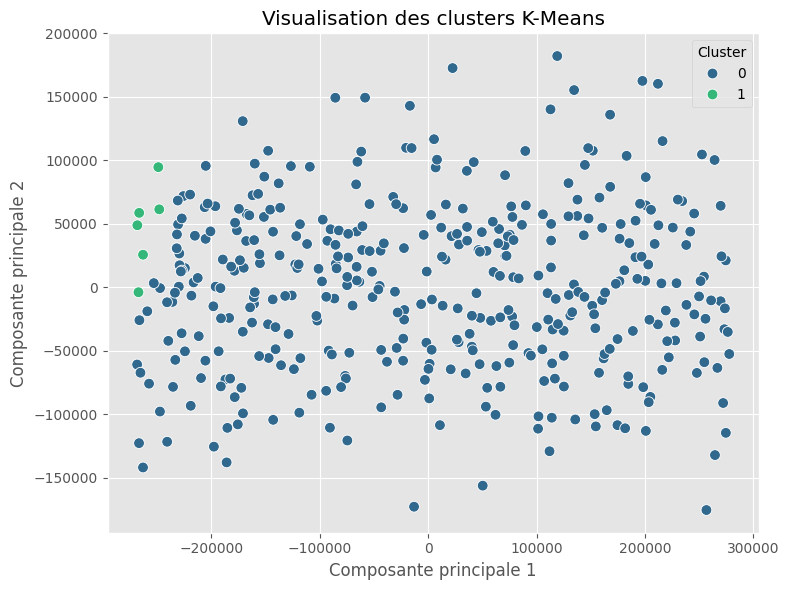

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 1. Préparation des données pour k-means
X_kmeans_test = df.loc[X_test.index, ['revenu_mensuel', 'montant_pret', 'score_credit']]

# 2. Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_kmeans_test)

# 3. Prédictions des clusters
labels = kmeans.predict(X_kmeans_test)

# 4. Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette="viridis", s=60)
plt.title("Visualisation des clusters K-Means")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

## 17 : Visualisation des clusters

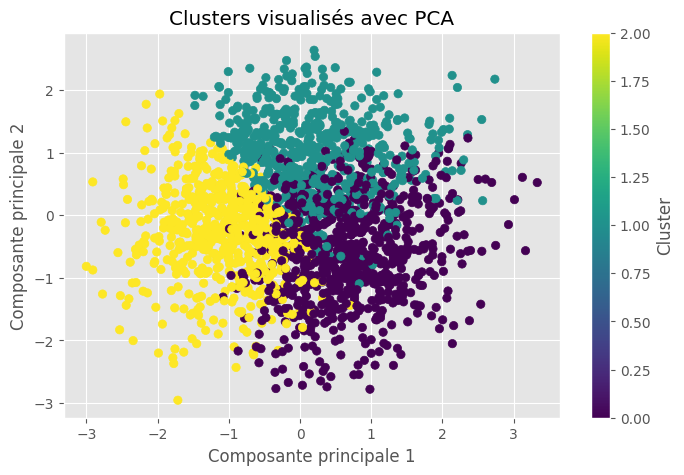

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df['cluster'], cmap='viridis')
plt.title("Clusters visualisés avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Cluster')
plt.show()

## 18 : Classification par score

In [52]:
df['score_category'] = np.where(df['score_credit'] > 60, 1, 0)
print(df['score_category'].value_counts())

score_category
1    1203
0     797
Name: count, dtype: int64


## 19 : Fonction de prédiction

In [53]:
def predict_risk(client_data_dict):
    client_df = pd.DataFrame([client_data_dict])
    
    # Encodage et standardisation comme pour X
    # Assure-toi que les colonnes sont dans le bon ordre et bien transformées
    client_df_encoded = pd.get_dummies(client_df)
    missing_cols = set(X.columns) - set(client_df_encoded.columns)
    for col in missing_cols:
        client_df_encoded[col] = 0
    client_df_encoded = client_df_encoded[X.columns]  # réordonner
    
    prob = xgb.predict_proba(client_df_encoded)[0][1]
    return prob

## 20 : Recommandations 

1. Meilleur modèle random forest
2. Pas de discrimination entre les sexes (très léger delta)
3. favoriser les zones ubraines
4. Le profil typique à risque : âge aux alentours de 44 ans, avec un revenu de 171 000 et un crédit de 57
5. Les variables les plus importantes sont l'historique de défaut, les scores de crédit et de catégories, le revenu mensuel et enfin le montant du prêt.